In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [6]:
df.shape

(2938, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
print(len(df.Year.unique()))
print(df.Year.unique())

16
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


In [9]:
print(len(df.Country.unique()))
print(df.Country.unique())

193
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic 

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.221920
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("******"*10)

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
************************************************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
************************************************************


In [14]:
print(df['Status'].unique())

['Developing' 'Developed']


In [15]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [16]:
df.describe(include="object")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


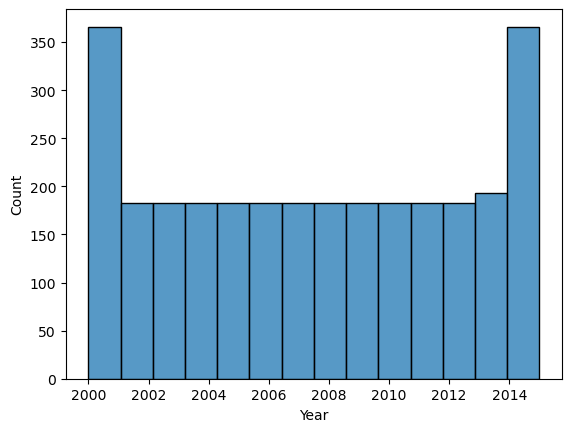

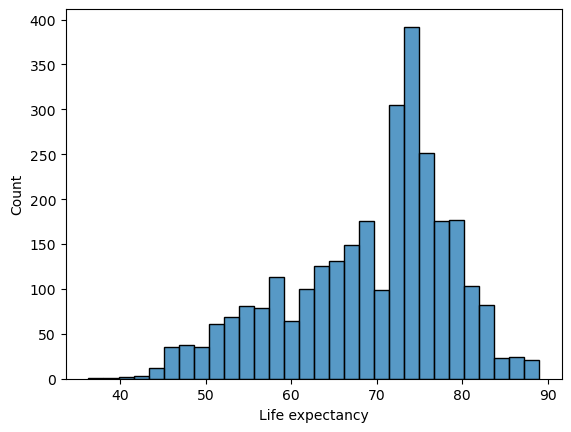

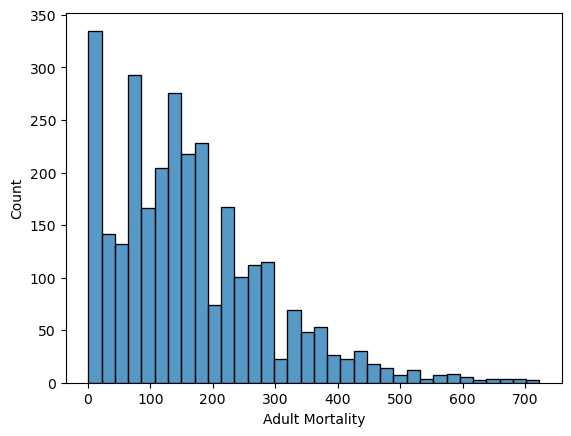

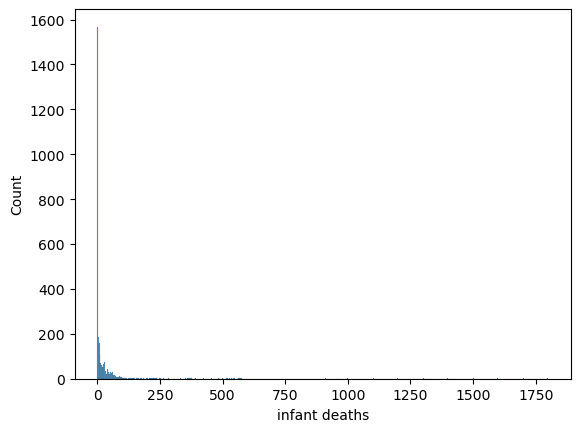

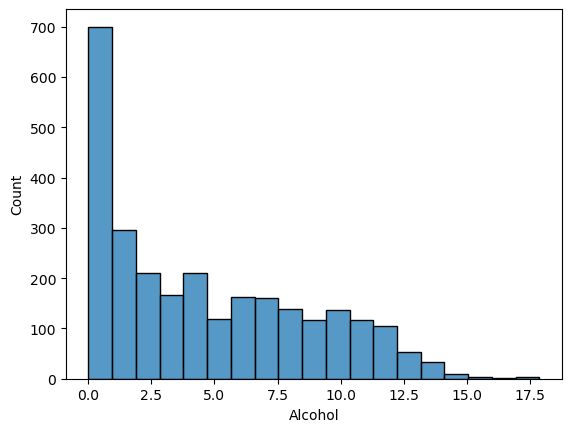

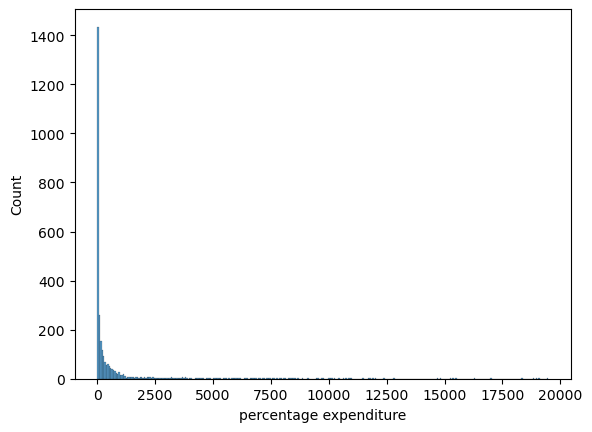

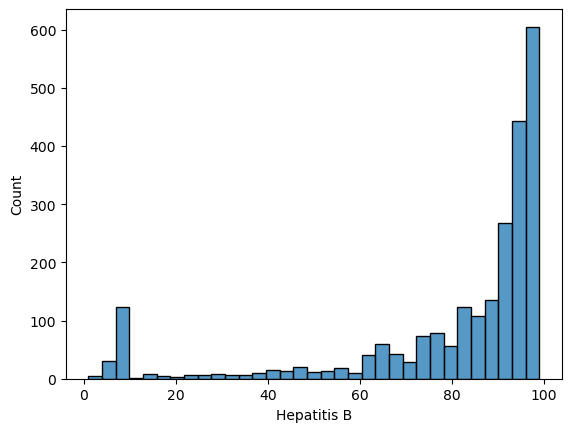

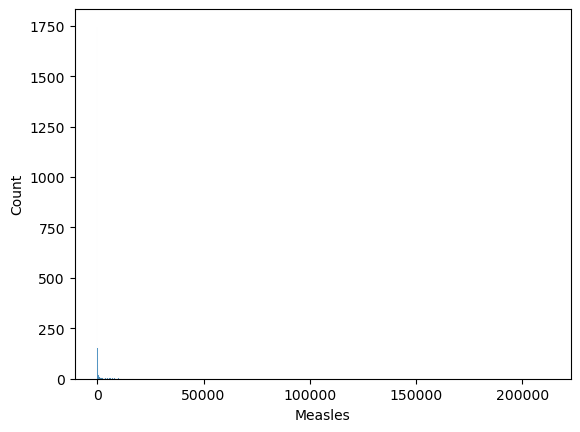

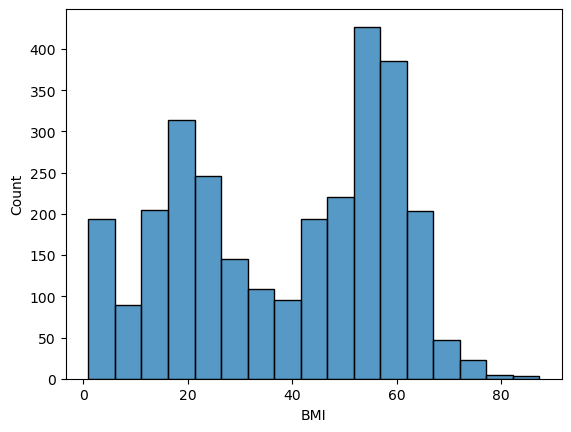

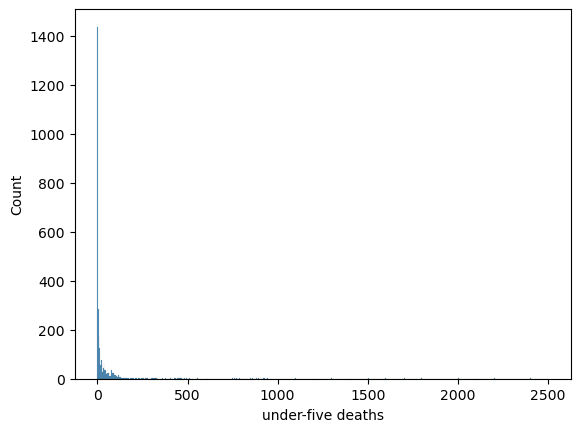

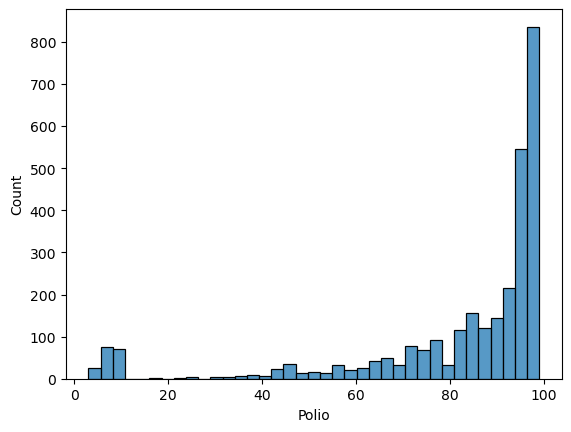

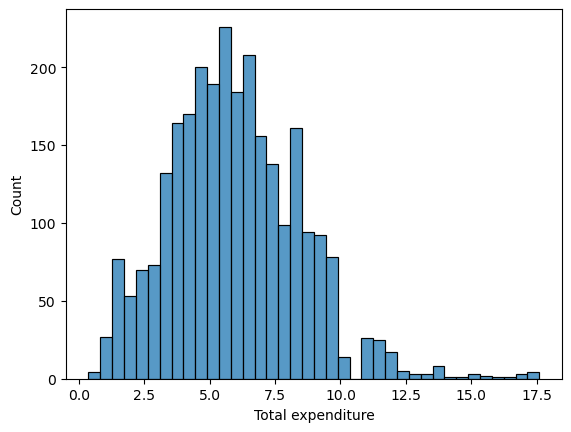

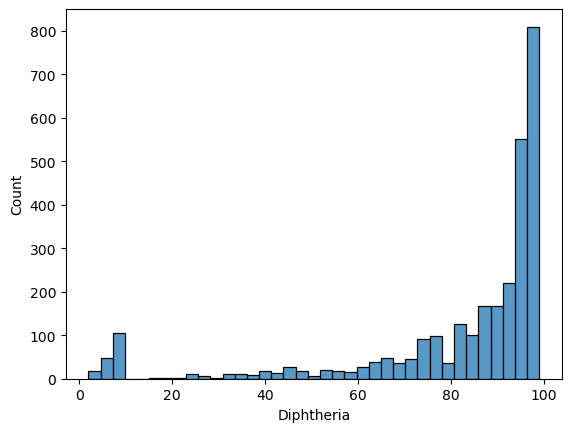

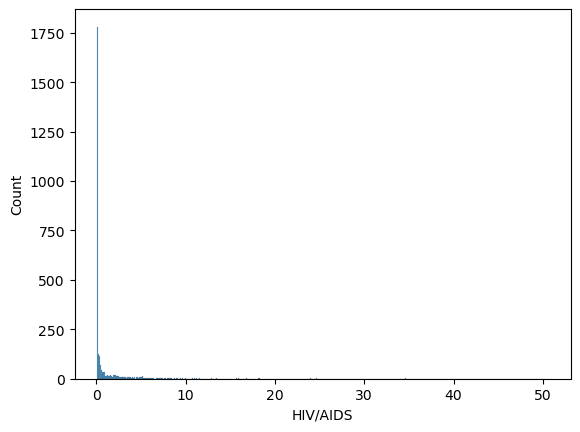

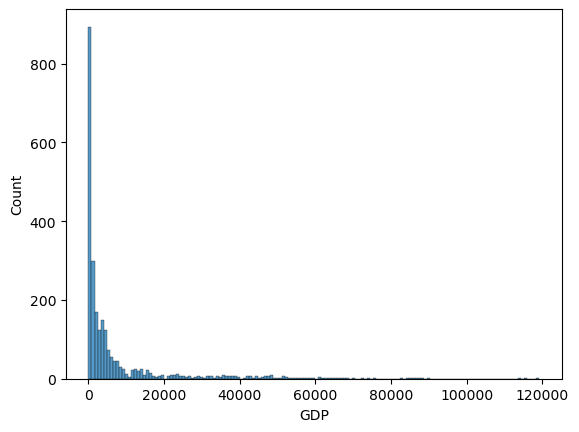

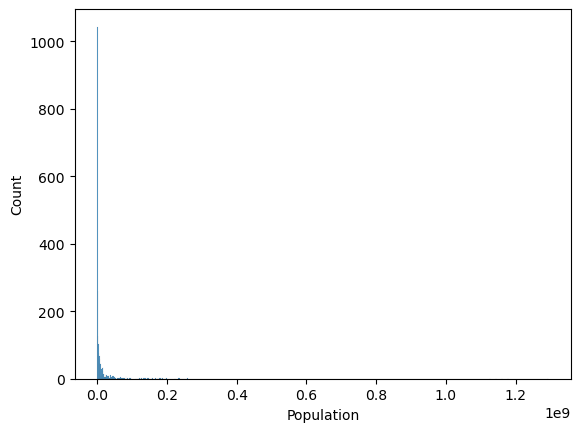

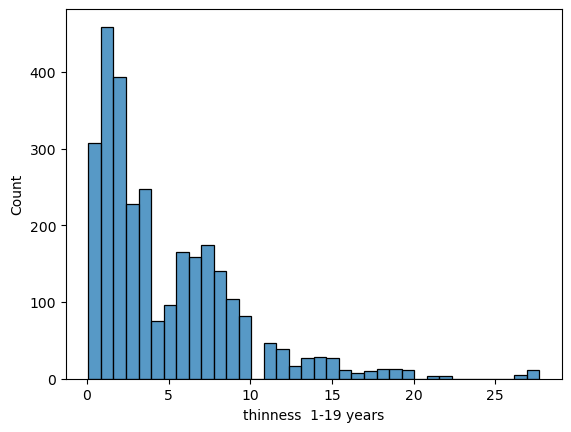

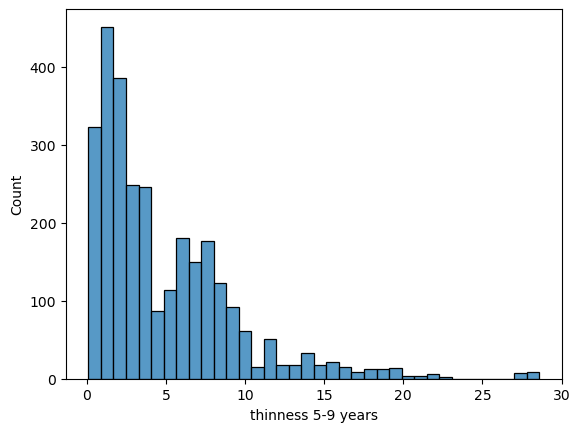

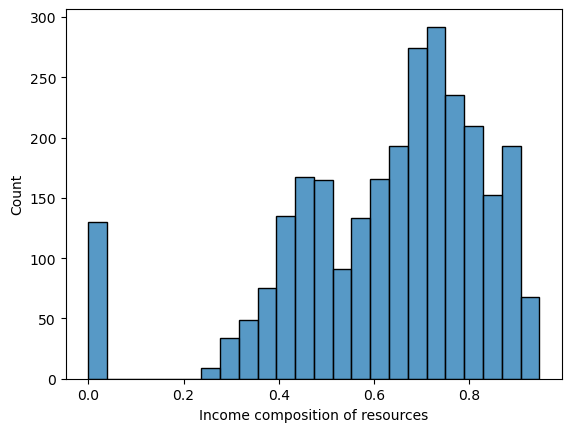

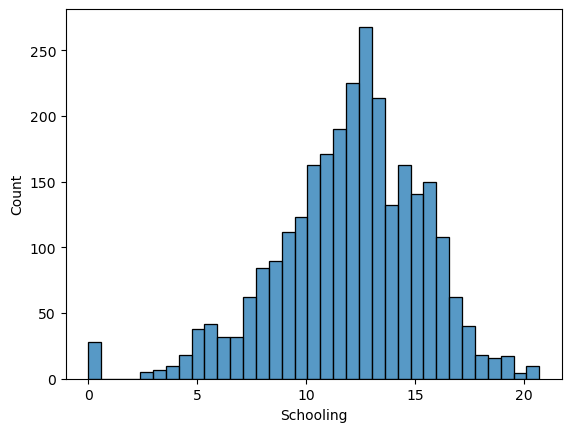

In [17]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

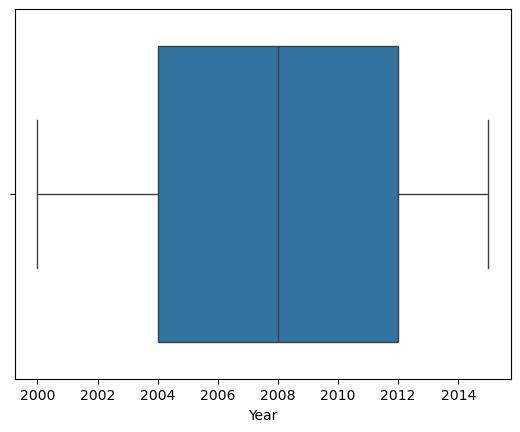

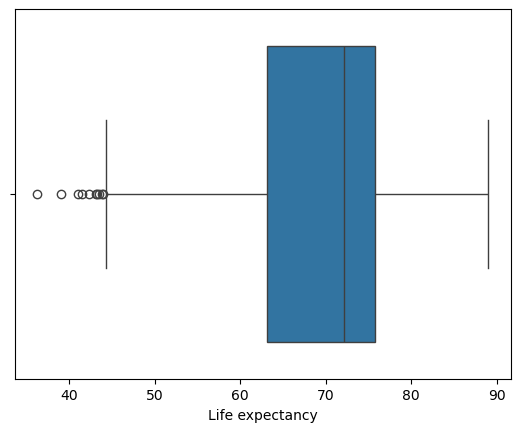

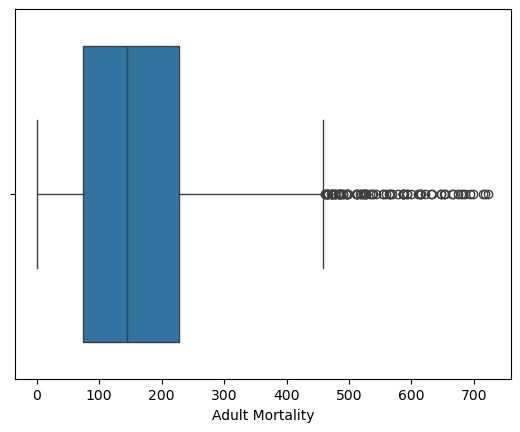

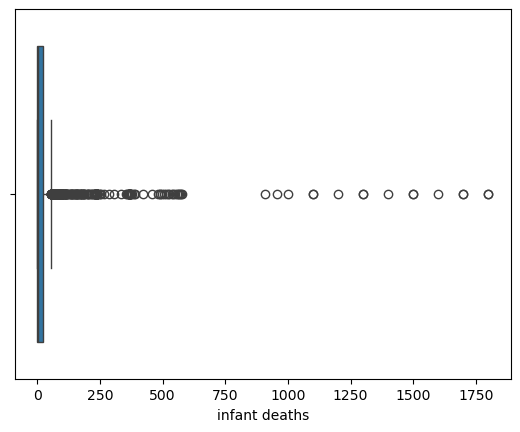

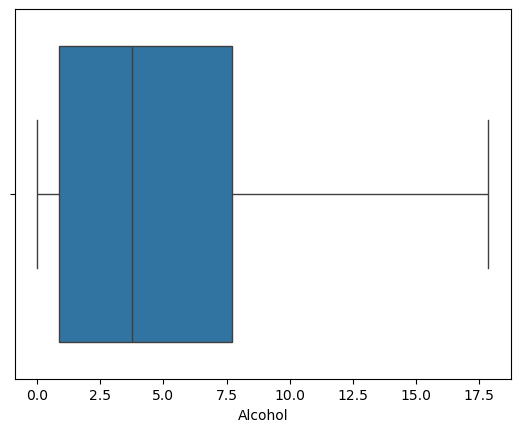

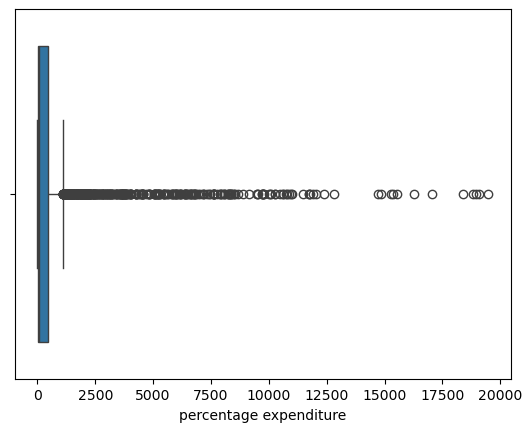

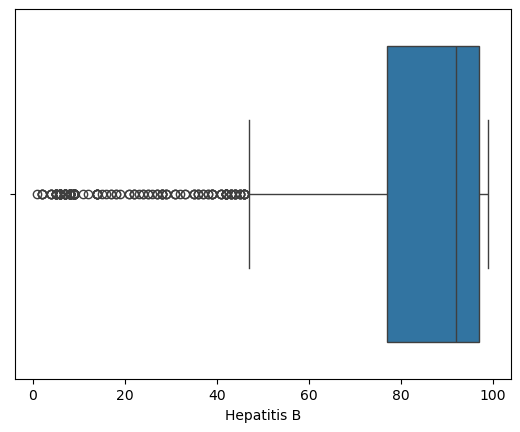

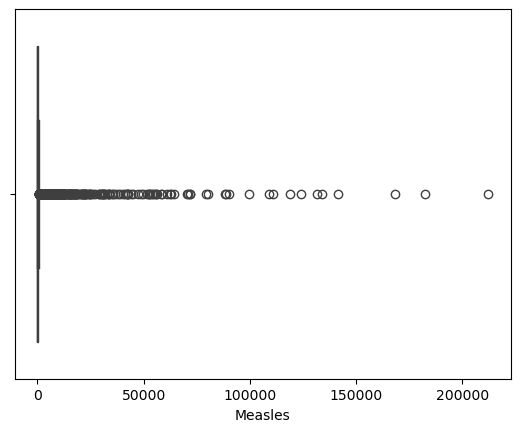

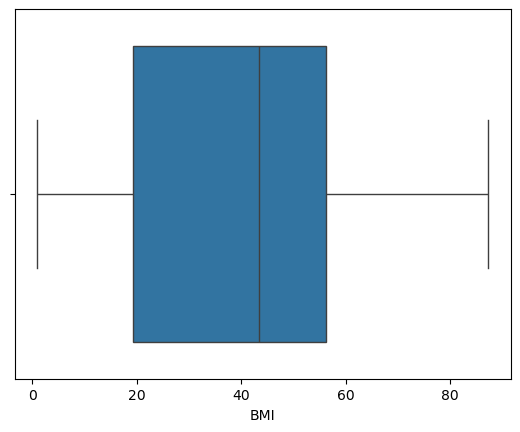

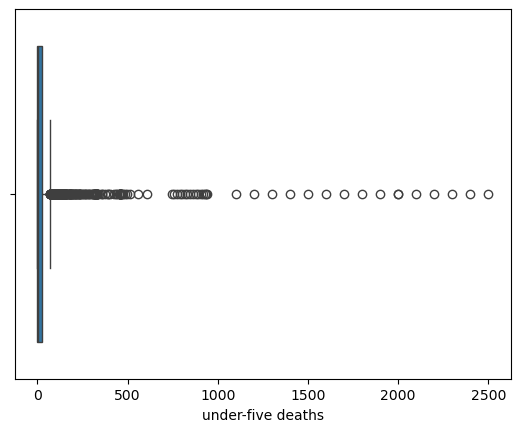

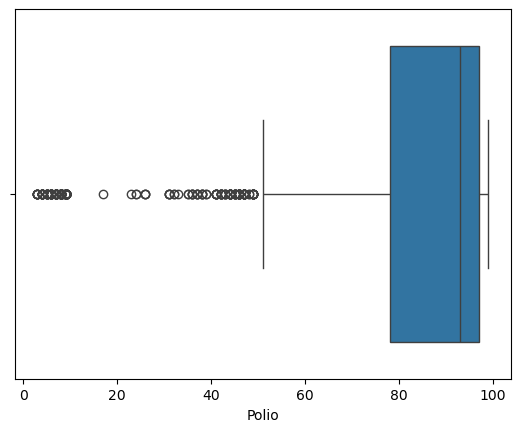

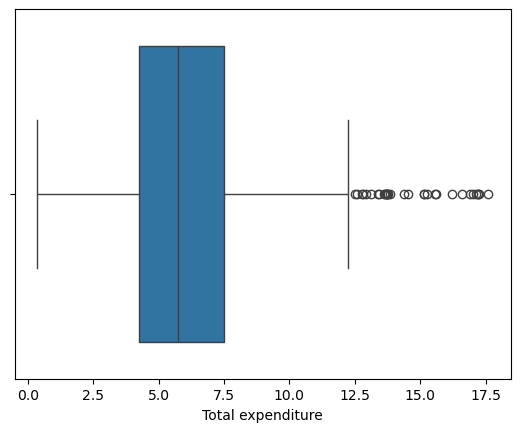

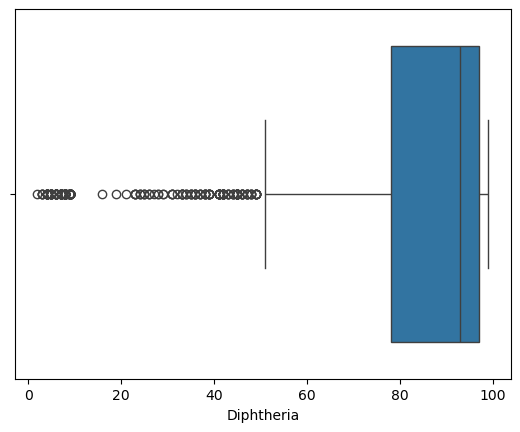

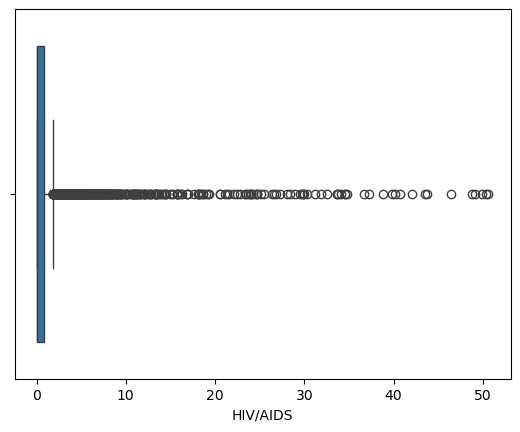

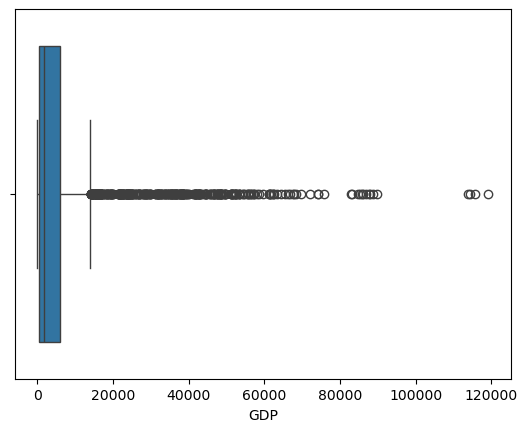

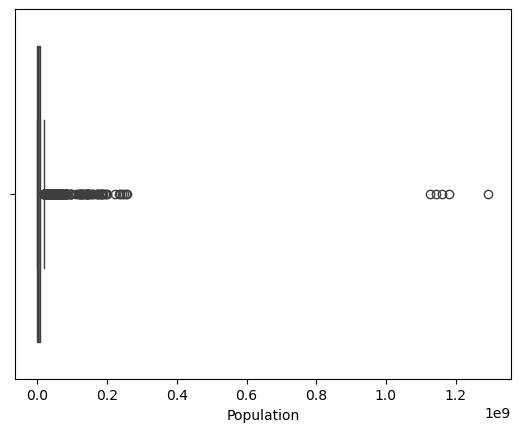

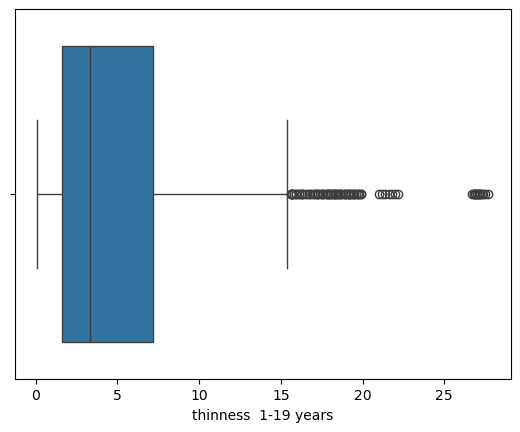

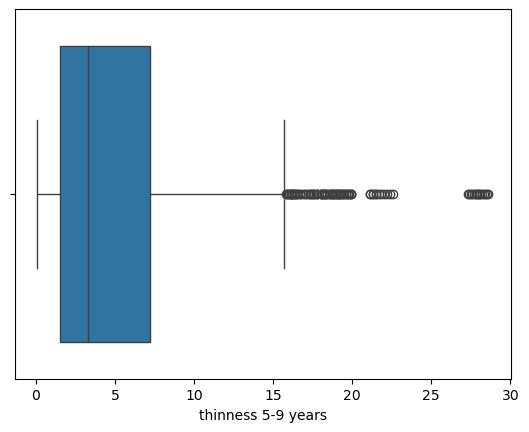

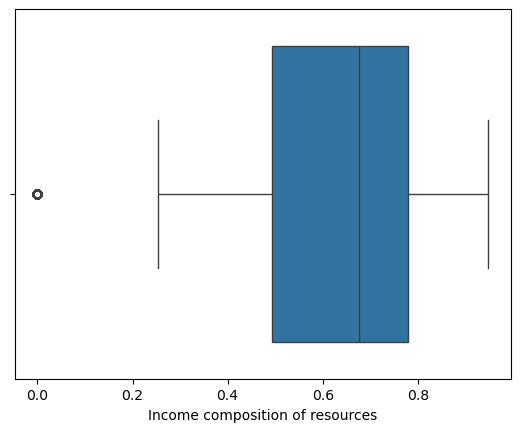

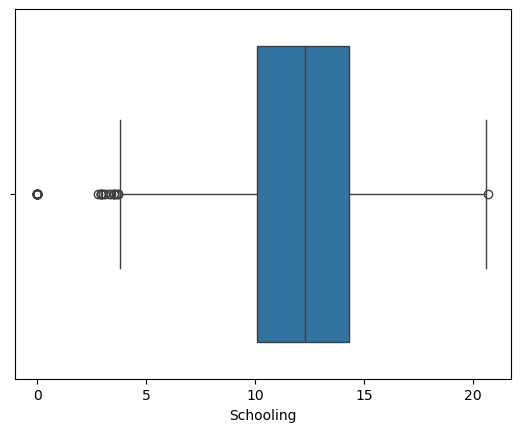

In [18]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

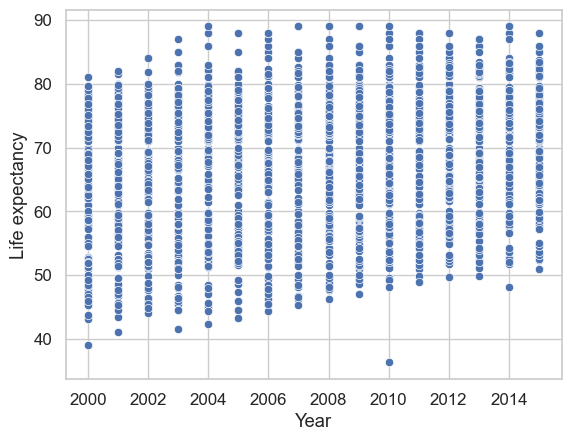

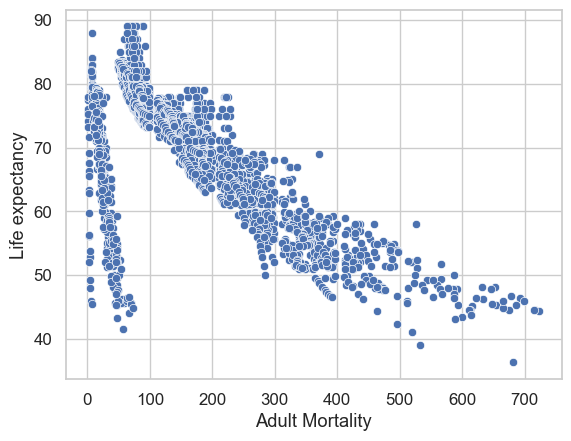

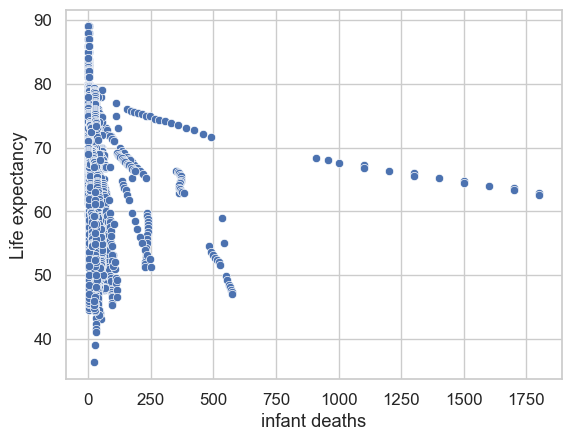

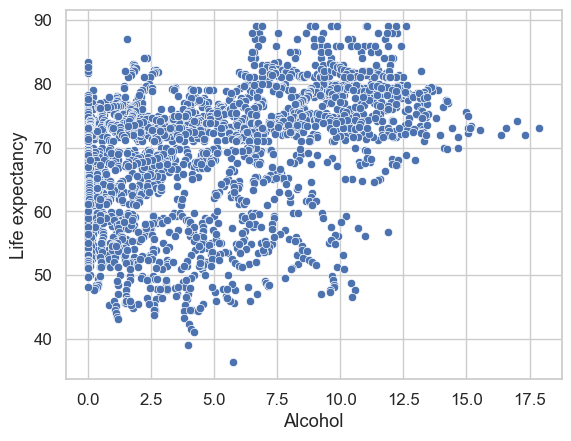

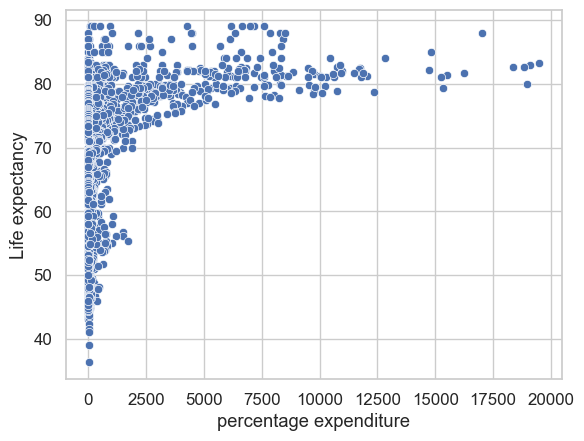

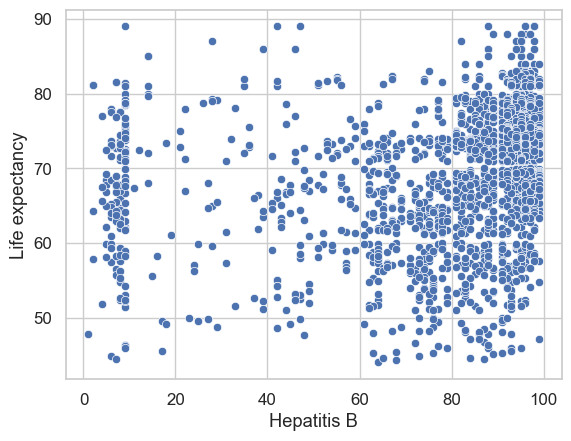

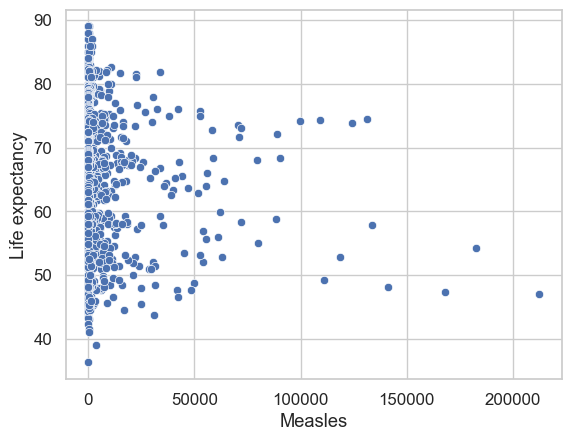

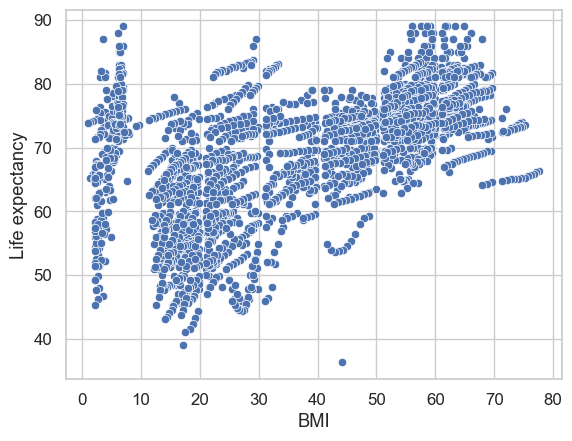

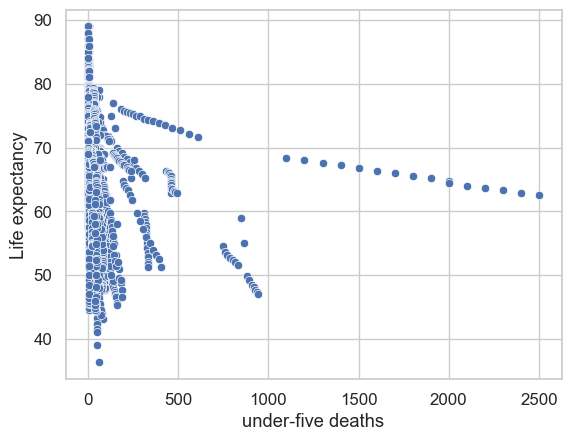

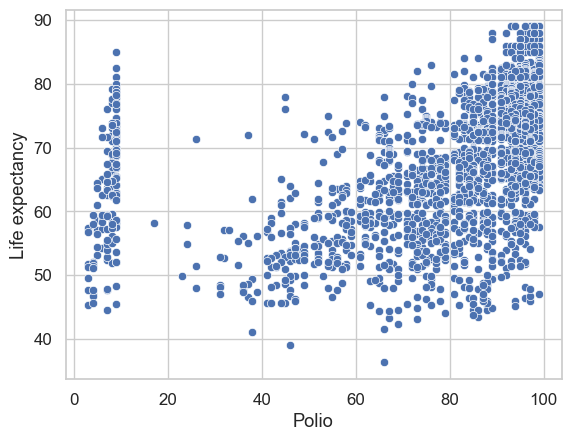

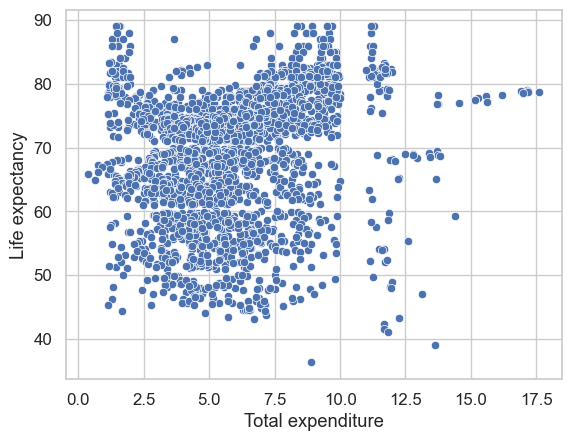

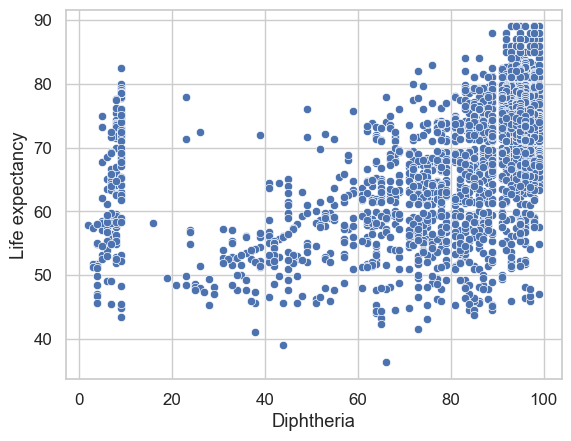

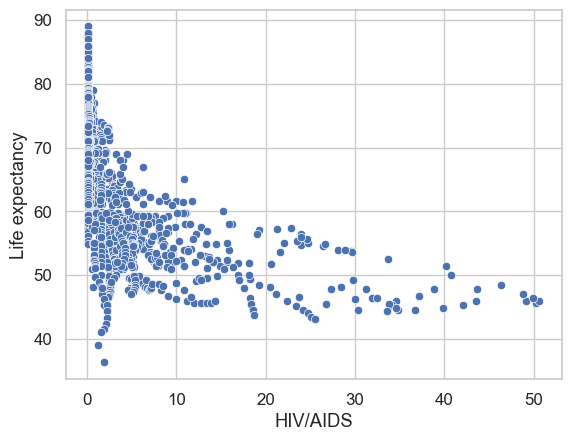

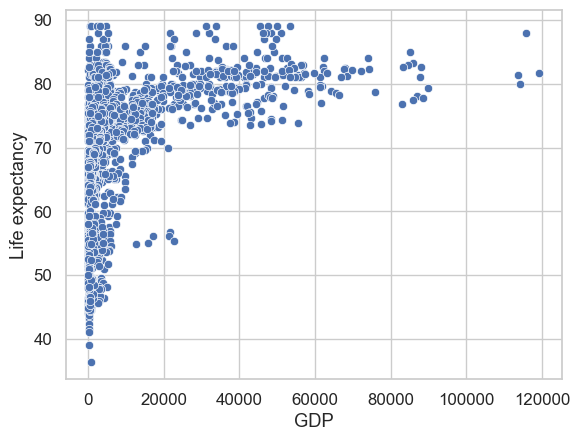

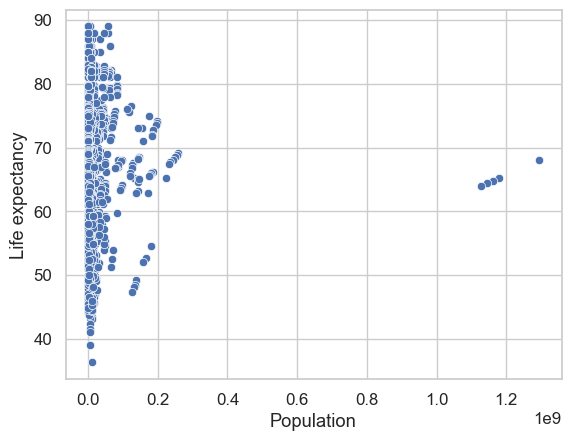

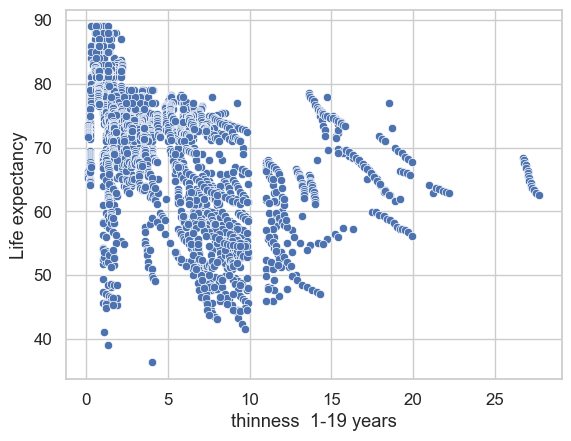

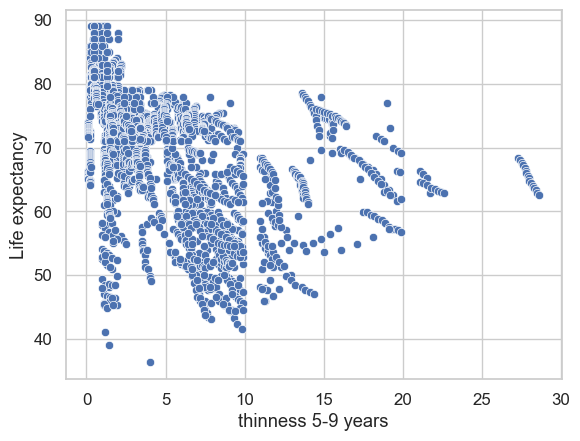

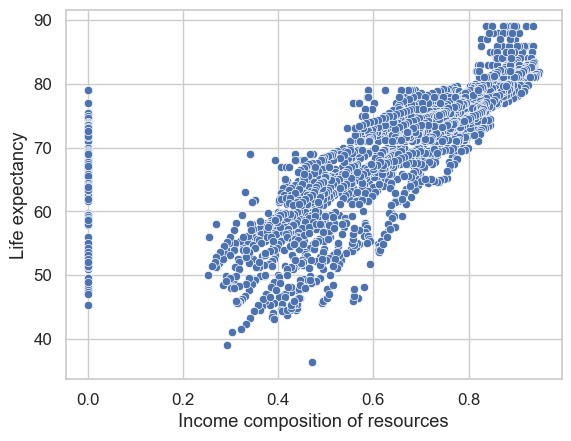

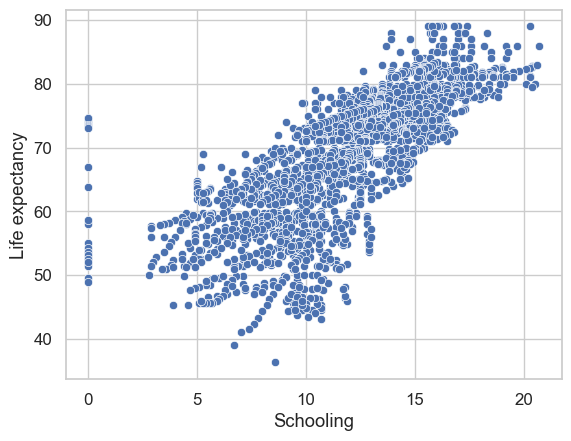

In [59]:

for i in ['Year','Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    sns.scatterplot(data=df, x=i,y='Life expectancy')
    plt.show()

In [20]:
s=df.select_dtypes(include="number").corr()

<Axes: >

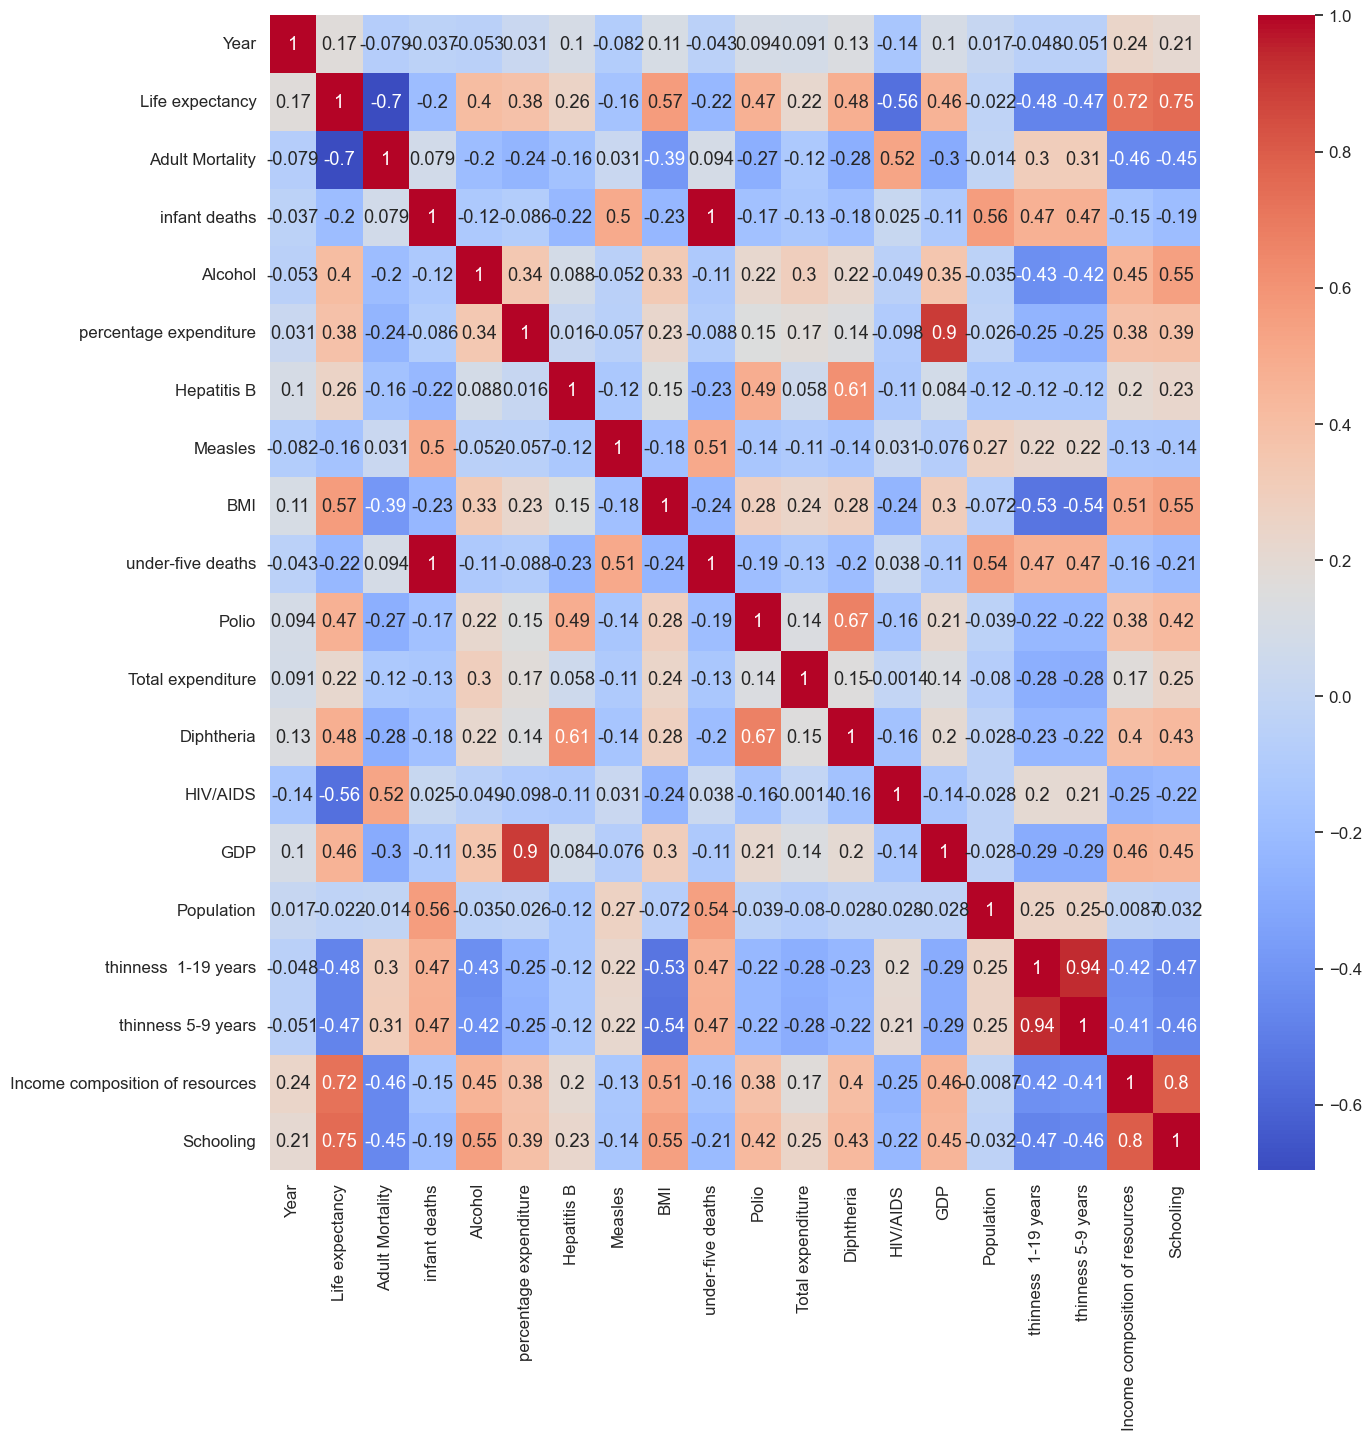

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True, cmap="coolwarm", )

In [22]:
df = df.dropna(subset=["Life expectancy"])

In [23]:
y = df["Life expectancy"]
X = df.drop(columns=["Life expectancy"])

In [24]:
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, test_size=0.2, random_state=42
#)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X_train[col] = np.clip(X_train[col], lower, upper)
    X_test[col] = np.clip(X_test[col], lower, upper)  # Apply same bounds to test set


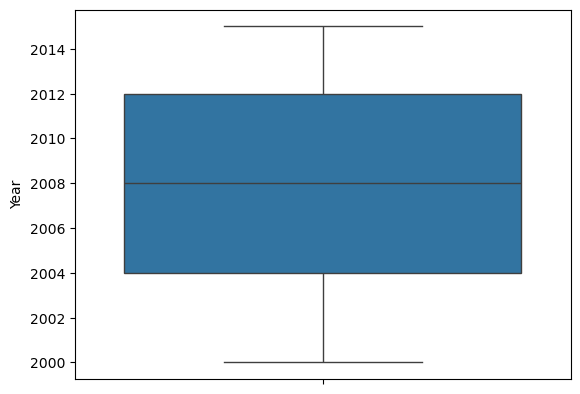

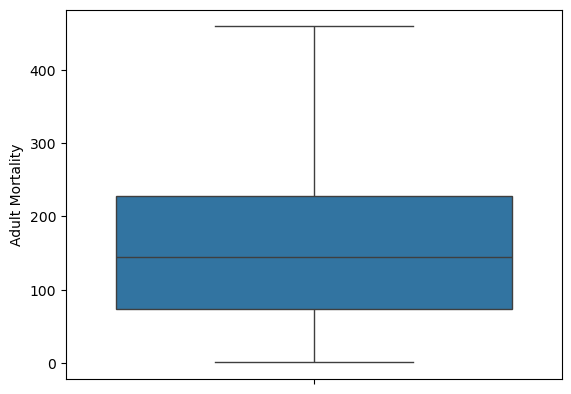

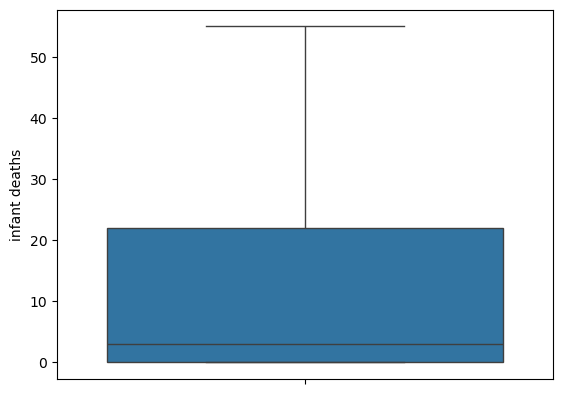

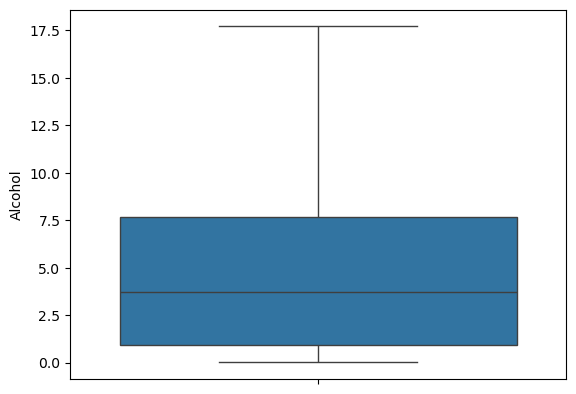

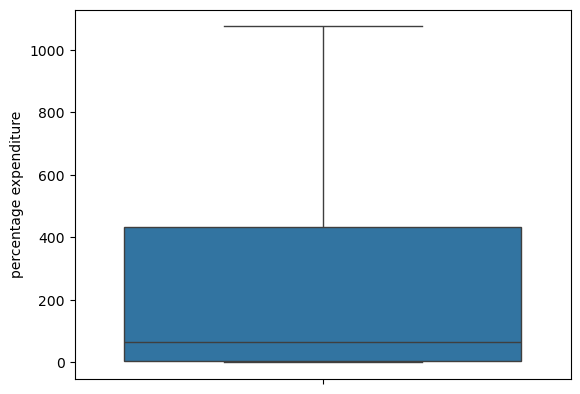

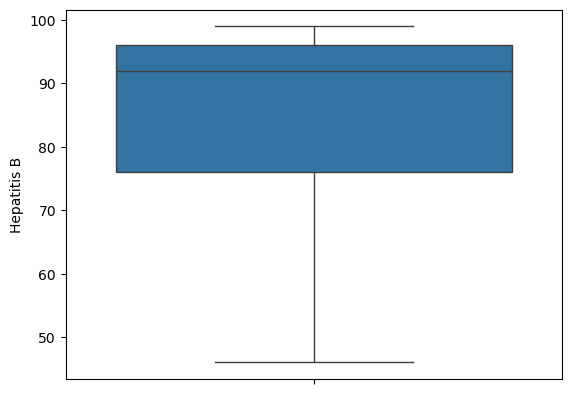

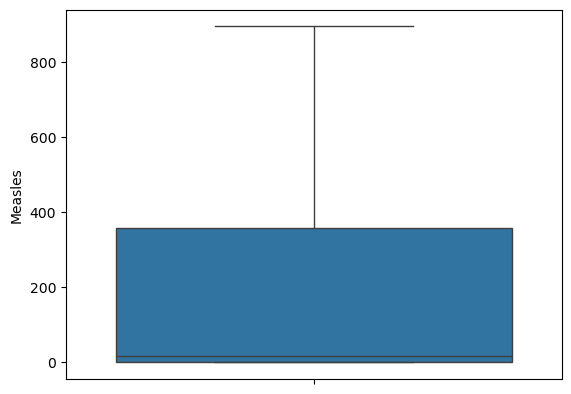

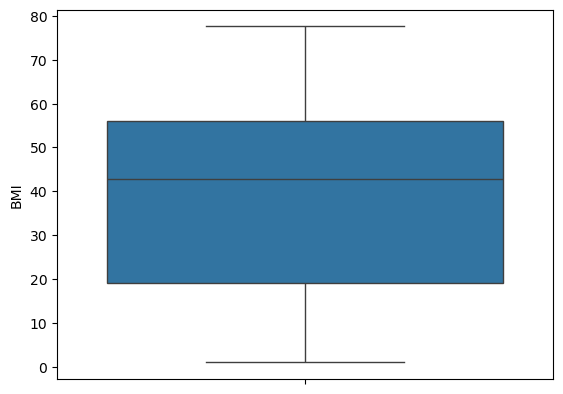

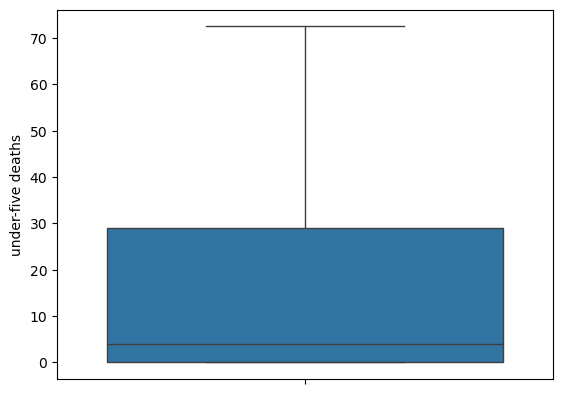

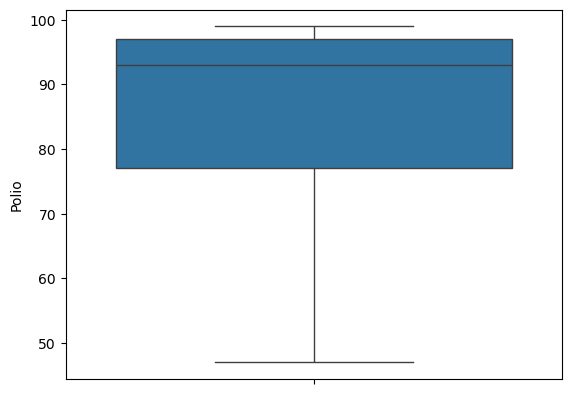

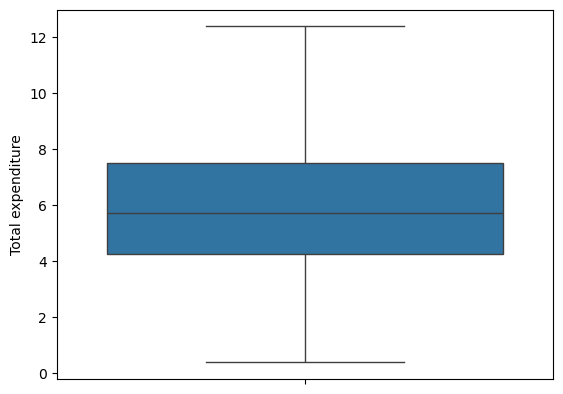

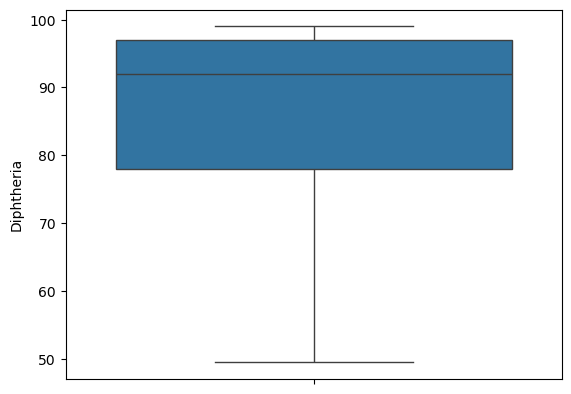

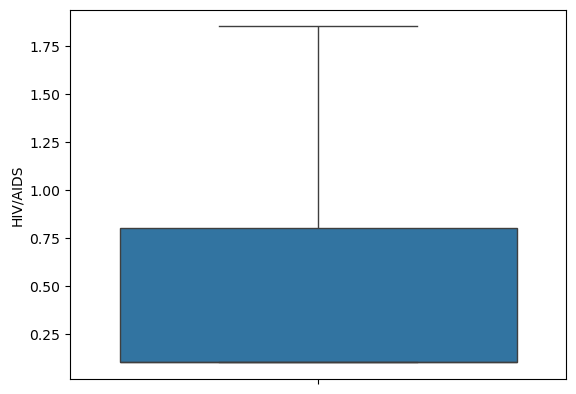

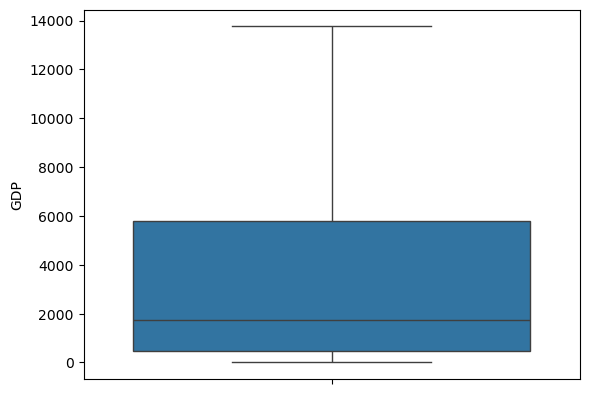

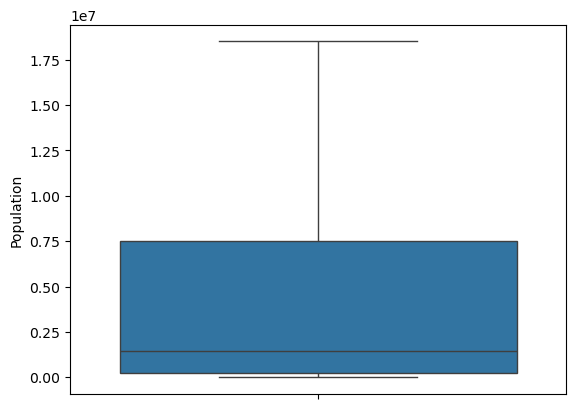

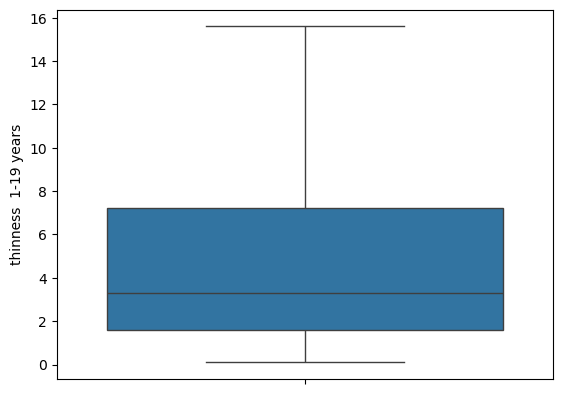

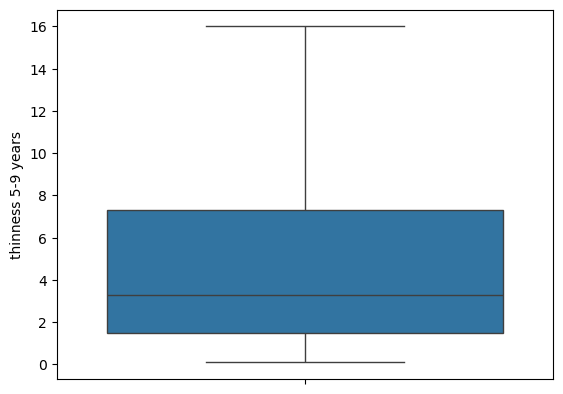

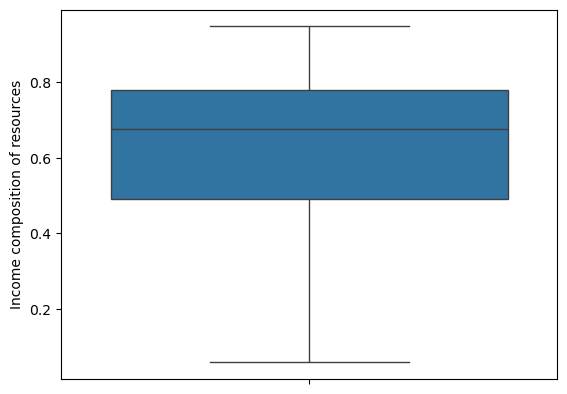

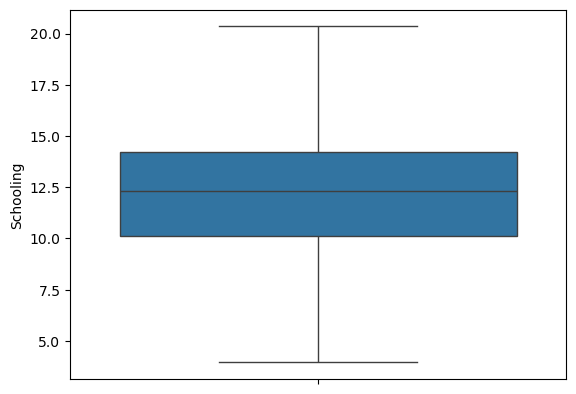

In [27]:
for col in num_cols:
    sns.boxplot(X_train[col])
    plt.show()

In [28]:
imputer_num = SimpleImputer(strategy="median")
X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])


In [29]:
imputer_cat = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])


In [30]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown="ignore")
encoded_cats_train = encoder.fit_transform(X_train[cat_cols])
encoded_cats_test = encoder.transform(X_test[cat_cols])

In [31]:
encoded_cat_df_train = pd.DataFrame(encoded_cats_train, columns=encoder.get_feature_names_out(cat_cols))
encoded_cat_df_test = pd.DataFrame(encoded_cats_test, columns=encoder.get_feature_names_out(cat_cols))


In [32]:
X_train_final = pd.concat([X_train[num_cols].reset_index(drop=True), encoded_cat_df_train.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[num_cols].reset_index(drop=True), encoded_cat_df_test.reset_index(drop=True)], axis=1)


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)


In [34]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [35]:
residuals=y_pred_lr-y_test
residuals

2399   -0.333581
196    -2.813371
2316    0.074672
1735    1.728021
1102    0.197659
          ...   
2452    2.927418
381    -0.069340
1784    0.622814
964    -5.135030
1945    0.717180
Name: Life expectancy, Length: 586, dtype: float64

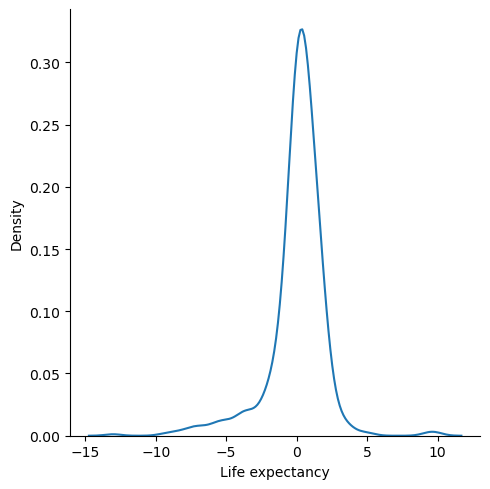

In [36]:
sns.displot(residuals,kind="kde")

In [37]:
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred_lr))
print("mean_squared_error: ",mean_squared_error(y_test,y_pred_lr))
print("root_mean_squared_error: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2 score: ",r2_score(y_test, y_pred_lr))


mean_absolute_error:  1.2717610884705037
mean_squared_error:  4.174881053137843
root_mean_squared_error:  2.0432525671433384
R2 score:  0.9517351456653584


In [38]:
# Random Forest (no scaling)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_final, y_train)
y_pred_rf = rf.predict(X_test_final)


In [39]:
# Metrics
print("Random Forest mean_absolute_error: ", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest mean_squared_error: ", mean_squared_error(y_test, y_pred_rf))
print("Random Forest root_mean_squared_error: ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2 score: ", r2_score(y_test, y_pred_rf))

Random Forest mean_absolute_error:  1.0320955631399307
Random Forest mean_squared_error:  2.8169281527303687
Random Forest root_mean_squared_error:  1.6783706839462993
Random Forest R2 score:  0.9674341315998702


In [40]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_rf)
    ],
     "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ],
     "RMSE": [
         np.sqrt(mean_squared_error(y_test, y_pred_lr)), 
        np.sqrt(mean_squared_error(y_test, y_pred_rf)) 
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})


In [41]:
print(results)

               Model       MSE       MAE      RMSE  R² Score
0  Linear Regression  4.174881  1.271761  2.043253  0.951735
1      Random Forest  2.816928  1.032096  1.678371  0.967434


 Model       MSE  R² Score
0  Linear Regression  3.716118  0.958968
1      Random Forest  3.322035  0.963319

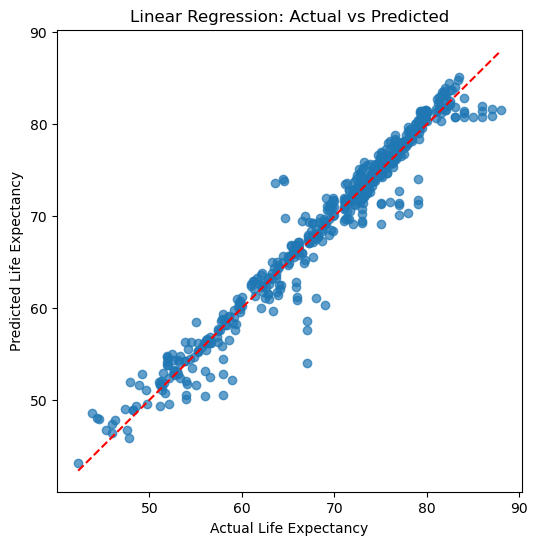

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.show()


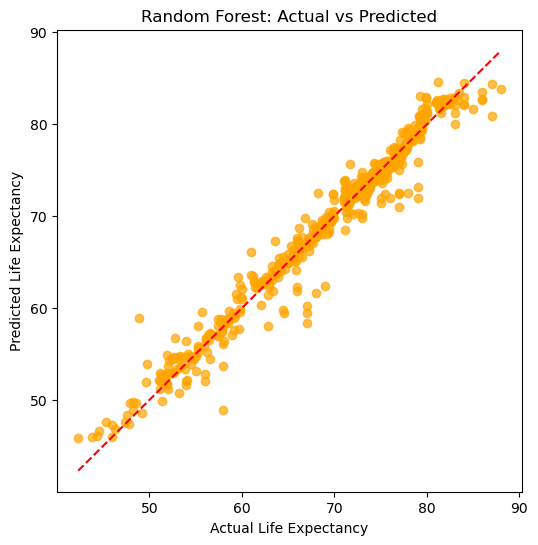

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='orange')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



### new prediction

In [44]:
df.shape

(2928, 22)

In [45]:
first_row_df = df.drop(columns=["Life expectancy"]).iloc[[0]]

In [46]:
first_row_df[num_cols] = imputer_num.transform(first_row_df[num_cols])

In [47]:
first_row_df[cat_cols] = imputer_cat.transform(first_row_df[cat_cols])

In [48]:
first_row_encoded = encoder.transform(first_row_df[cat_cols])
first_row_encoded_df = pd.DataFrame(
    first_row_encoded, 
    columns=encoder.get_feature_names_out(cat_cols)
)

In [49]:
first_row_processed = pd.concat(
    [first_row_df[num_cols].reset_index(drop=True), 
     first_row_encoded_df.reset_index(drop=True)], 
    axis=1
)

In [50]:
first_row_scaled = scaler.transform(first_row_processed)


In [51]:
lr_first_row_prediction = lr.predict(first_row_scaled)
print("Predicted Life Expectancy (using Linear Regression) is: ", round(lr_first_row_prediction[0], 2))


Predicted Life Expectancy (using Linear Regression) is:  58.29


In [52]:
rf_first_row_prediction = rf.predict(first_row_scaled)
print("Predicted Life Expectancy (using Random Forest) is: ", round(rf_first_row_prediction[0], 2))


Predicted Life Expectancy (using Random Forest) is:  62.22


pickle 
--


In [53]:
import pickle

In [54]:
pickle.dump(rf,open('rf.pkl','wb'))

In [55]:
pickle_model=pickle.load(open('rf.pkl', 'rb'))

In [56]:
pickle_model.predict(first_row_scaled)

array([62.221])